# Data 1

In [92]:
import numpy as np
import pandas as pd;pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

VAT is monthly tax. CIT, EDT, NITDA, PTF, and others except WHT are yearly. WHT is payed anytime, it offsets the CIT at the end of the tax year.

In [4]:
# df_1 = pd.read_csv('/content/drive/MyDrive/Opeyemi MSC Project/LMSTOcleaned_dataset.csv')
df_1 = pd.read_csv('LMSTOcleaned_dataset.csv')
df_1.columns = df_1.columns.str.title()
df_1.head(2)

,Taxpayer,Tax,Amount,Cit,Edt,Nitdel,Naseni,Ptf,Paymentgateway,Office,State,Region,Segment,Department,Sector,Filing Date,Payment Date
0,SOLBEC LIMITED,VAT,"4,500.00",-,-,-,-,-,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45.000
1,SOLBEC LIMITED,VAT,"6,100.00",-,-,-,-,-,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08.000


In [5]:
df_1.nunique()

Taxpayer          1655
Tax                  8
Amount            6275
Cit                707
Edt               2001
Nitdel              10
Naseni              10
Ptf               1421
Paymentgateway       3
Office               1
State                1
Region               1
Segment              1
Department           1
Sector              19
Filing Date        845
Payment Date      9396
dtype: int64

In [6]:
df_1['Tax'].value_counts()

Tax
VAT          4524
CIT GROUP    3657
WHT          1104
EMTL           89
WVAT           16
PAYE           10
CGT             5
SD              5
Name: count, dtype: int64

In [7]:
for tax_type in df_1['Tax'].value_counts().index:
    # Extract amounts for the current tax type
    amounts = df_1.loc[df_1['Tax'] == tax_type, 'Amount']
    # Add a new column for the current tax type and fill with amounts
    df_1[tax_type] = amounts

df_1.drop(columns=['Amount', 'Tax'], inplace=True)
df_1.replace('-', np.nan, inplace=True)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Taxpayer        9410 non-null   object
 1   Cit             3657 non-null   object
 2   Edt             3657 non-null   object
 3   Nitdel          3657 non-null   object
 4   Naseni          3657 non-null   object
 5   Ptf             3657 non-null   object
 6   Paymentgateway  9410 non-null   object
 7   Office          9410 non-null   object
 8   State           9410 non-null   object
 9   Region          9410 non-null   object
 10  Segment         9410 non-null   object
 11  Department      9410 non-null   object
 12  Sector          9410 non-null   object
 13  Filing Date     9410 non-null   object
 14  Payment Date    9410 non-null   object
 15  VAT             4524 non-null   object
 16  CIT GROUP       3657 non-null   object
 17  WHT             1104 non-null   object
 18  EMTL    

In [9]:
df_1.isnull().sum().sort_values(ascending=False)

SD                9405
CGT               9405
PAYE              9400
WVAT              9394
EMTL              9321
WHT               8306
Edt               5753
Nitdel            5753
Naseni            5753
Ptf               5753
Cit               5753
CIT GROUP         5753
VAT               4886
Payment Date         0
Taxpayer             0
Filing Date          0
Sector               0
Segment              0
Region               0
State                0
Office               0
Paymentgateway       0
Department           0
dtype: int64

In [10]:
df_1[df_1.isnull().any(axis=1)]

,Taxpayer,Cit,Edt,Nitdel,Naseni,Ptf,Paymentgateway,Office,State,Region,Segment,Department,Sector,Filing Date,Payment Date,VAT,CIT GROUP,WHT,EMTL,WVAT,PAYE,CGT,SD
0,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45.000,"4,500.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08.000,"6,100.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-10-09,2020-10-09 12:56:54.000,"6,900.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-11-11,2020-11-16 15:28:44.000,"7,090.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-12-11,2020-12-11 15:32:09.000,"5,580.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,METRICS INTEGRATED SOLAR SERVICES LTD,0,0,0,0,412.58,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2023-06-26,2023-12-31 18:51:26.000,NaN,412.58,NaN,NaN,NaN,NaN,NaN,NaN
9406,AVENUE3 BUSINESS SOLUTIONS LTD,0,0,0,0,0,QuickTeller,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2023-02-16,2023-12-31 19:55:00.000,NaN,"30,000.00",NaN,NaN,NaN,NaN,NaN,NaN
9407,LEADSCAPE GLOBAL CONCEPT LTD,0,"118,841.87",0,0,235,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,Administrative and support service activities,2022-06-23,2023-12-31 19:29:09.000,NaN,"119,076.87",NaN,NaN,NaN,NaN,NaN,NaN
9408,SHEENCARE MEDICAL SERVICES LIMITED,0,0,0,0,25,QuickTeller,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,Human health and social work activities,2023-12-31,2023-12-31 23:52:00.000,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import warnings;warnings.filterwarnings("ignore")

In [12]:
# fill null values with 0
df_1.fillna(0, inplace=True)
# Rename columns to lowercase and replace spaces with underscores
df_1.columns = df_1.columns.str.lower().str.replace(' ', '_')

# convert date attributes to datetime from object
df_1['payment_date'] = pd.to_datetime(df_1['payment_date'])
# df_1['filing_date'] = pd.to_datetime(df_1['filing_date'], errors='coerce', format='%Y-%m-%d', infer_datetime_format=True).fillna(df_1['filing_date'])
df_1['filing_date'] = pd.to_datetime(df_1['filing_date'], errors='ignore', format='%Y-%m-%d')

In [13]:
df_1.isnull().sum().any()

False

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   taxpayer        9410 non-null   object        
 1   cit             9410 non-null   object        
 2   edt             9410 non-null   object        
 3   nitdel          9410 non-null   object        
 4   naseni          9410 non-null   object        
 5   ptf             9410 non-null   object        
 6   paymentgateway  9410 non-null   object        
 7   office          9410 non-null   object        
 8   state           9410 non-null   object        
 9   region          9410 non-null   object        
 10  segment         9410 non-null   object        
 11  department      9410 non-null   object        
 12  sector          9410 non-null   object        
 13  filing_date     9410 non-null   object        
 14  payment_date    9410 non-null   datetime64[ns]
 15  vat 

In [15]:
# df_1 = pd.read_csv('first_data.csv').drop(['Unnamed: 27'], axis=1).head(2)
df_1.head(2)

,taxpayer,cit,edt,nitdel,naseni,ptf,paymentgateway,office,state,region,segment,department,sector,filing_date,payment_date,vat,cit_group,wht,emtl,wvat,paye,cgt,sd
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0


In [16]:
df_1.rename(columns={
    'vat': 'value_added_tax',
    'cit': 'company_income_tax',
    'edt': 'education_tax',
    'nitdel': 'national_information_technology_levy',
    'ptf': 'petroleum_trust_fund',
    'paymentgateway': 'payment_gateway',
    'wht': 'withholding_tax',
    'emtl': 'electronic_money_transfer_levy',
    'wvat': 'withholding_value_added_tax',
    'paye': 'pay_as_you_earn',
    'cgt': 'capital_gains_tax',
    'sd': 'stamp_duties'
}, inplace=True)

create a new column from df_1. <br>
The column name will be called vat_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
value_added_tax	paid on or before the 21st of the month will be known as "Non-Default" while those payment after the 21st of the month will be known as "Default"

In [17]:
df_1['payment_date'] = pd.to_datetime(df_1['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'vat_compliance' column
conditions = [
    df_1['payment_date'].dt.day <= 21,  # Paid on or before the 21st of the month
    df_1['payment_date'].dt.day > 21    # Paid after the 21st of the month
]
# Define the values corresponding to each condition
values = ['Non-Default', 'Default']
# Create the 'vat_compliance' column based on the conditions
df_1['vat_compliance'] = np.select(conditions, values)
df_1['vat_compliance'].value_counts()

vat_compliance
Non-Default    6598
Default        2812
Name: count, dtype: int64

create a new column from df_1. <br>
The column name will be called cit_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
company_income_tax	paid on or before the 30th of June will be known as "Non-Default" while those payment after the 30th of June will be known as "Default"

In [18]:
df_1['payment_date'] = pd.to_datetime(df_1['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'cit_compliance' column
conditions_cit = [
    df_1['payment_date'].dt.month <= 6,  # Paid on or before the 30th of June
    df_1['payment_date'].dt.month > 6    # Paid after the 30th of June
]
# Define the values corresponding to each condition
values_cit = ['Non-Default', 'Default']
# Create the 'cit_compliance' column based on the conditions
df_1['cit_compliance'] = np.select(conditions_cit, values_cit)
df_1['cit_compliance'].value_counts()

cit_compliance
Default        4897
Non-Default    4513
Name: count, dtype: int64

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   taxpayer                              9410 non-null   object        
 1   company_income_tax                    9410 non-null   object        
 2   education_tax                         9410 non-null   object        
 3   national_information_technology_levy  9410 non-null   object        
 4   naseni                                9410 non-null   object        
 5   petroleum_trust_fund                  9410 non-null   object        
 6   payment_gateway                       9410 non-null   object        
 7   office                                9410 non-null   object        
 8   state                                 9410 non-null   object        
 9   region                                9410 non-null   object        
 10  

In [20]:
# review data 1 again

df_1.head(3)

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0,Non-Default,Default
2,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-10-09,2020-10-09 12:56:54,"6,900.00",0,0,0,0,0,0,0,Non-Default,Default


# Data 2

In [21]:
# df_2 = pd.read_csv('/content/drive/MyDrive/Opeyemi MSC Project/LMSTOWP_cleaned_dataset.csv', header=1)
df_2 = pd.read_csv('LMSTOWP_cleaned_dataset.csv', header=1)
df_2.dropna(inplace=True)
print(df_2.shape)
df_2.head()

(14764, 9)


,Payment Date,TIN,Amount,Payment Method,Assess Period,Tax Office,Tax Type,Bank Branch,Payment Service Provider
0,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,39060.46,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
1,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,39060.46,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
2,2013-09-11 00:00:00,AFTECH NIGERIA LIMITED,9150.00,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
3,2013-10-10 00:00:00,ZAMIC VENTURES LIMITED,106450.00,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
4,2013-10-23 00:00:00,AFTECH NIGERIA LIMITED,539666.50,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)


In [22]:
display(df_1.head(1), df_2.head(1))

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default


,Payment Date,TIN,Amount,Payment Method,Assess Period,Tax Office,Tax Type,Bank Branch,Payment Service Provider
0,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,39060.46,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)


In [23]:
for tax_type in df_2['Tax Type'].value_counts().index:
    amounts = df_2.loc[df_2['Tax Type'] == tax_type, 'Amount']
    df_2[tax_type] = amounts

df_2.drop(columns=['Amount', 'Tax Type'], inplace=True)
df_2.replace('-', np.nan, inplace=True)

In [24]:
df_2.isna().sum().sort_values(ascending=False)

Pay As You Earn             14763
Personal Income Tax         14762
Interest                    14759
Capital Gains Tax           14753
Pre-Operational Levy        14716
Penalties                   14617
Education Tax               14169
Withholding Tax             14132
Company Income Tax          10582
Value Added Tax              5623
TIN                             0
Payment Service Provider        0
Bank Branch                     0
Tax Office                      0
Assess Period                   0
Payment Method                  0
Payment Date                    0
dtype: int64

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14764 entries, 0 to 14763
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Payment Date              14764 non-null  object 
 1   TIN                       14764 non-null  object 
 2   Payment Method            14764 non-null  object 
 3   Assess Period             14764 non-null  object 
 4   Tax Office                14764 non-null  object 
 5   Bank Branch               14764 non-null  object 
 6   Payment Service Provider  14764 non-null  object 
 7   Value Added Tax           9141 non-null   float64
 8   Company Income Tax        4182 non-null   float64
 9   Withholding Tax           632 non-null    float64
 10  Education Tax             595 non-null    float64
 11  Penalties                 147 non-null    float64
 12  Pre-Operational Levy      48 non-null     float64
 13  Capital Gains Tax         11 non-null     float64
 14  Interest   

In [26]:
df_2[['Value Added Tax',
      'Company Income Tax',
      'Withholding Tax ',
      'Education Tax ',
      'Penalties ',
      'Pre-Operational Levy ',
      'Capital Gains Tax ',
      'Interest ',
      'Personal Income Tax',
      'Pay As You Earn ']] = df_2[['Value Added Tax',
                                   'Company Income Tax',
                                   'Withholding Tax ',
                                   'Education Tax ',
                                   'Penalties ',
                                   'Pre-Operational Levy ',
                                   'Capital Gains Tax ',
                                   'Interest ',
                                   'Personal Income Tax',
                                   'Pay As You Earn ']].fillna(0).astype(int)

In [27]:
df_2.head(2)

,Payment Date,TIN,Payment Method,Assess Period,Tax Office,Bank Branch,Payment Service Provider,Value Added Tax,Company Income Tax,Withholding Tax,Education Tax,Penalties,Pre-Operational Levy,Capital Gains Tax,Interest,Personal Income Tax,Pay As You Earn
0,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
1,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0


In [28]:
# convert date attributes to datetime from object
df_2['Payment Date'] = pd.to_datetime(df_2['Payment Date'])
# Rename columns to lowercase and replace spaces with underscores
df_2.columns = df_2.columns.str.lower().str.replace(' ', '_').str.rstrip('_')
# Rename tin column to taxpayer
df_2.rename(columns={'tin': 'taxpayer'}, inplace=True)

In [29]:
df_2.head()

,payment_date,taxpayer,payment_method,assess_period,tax_office,bank_branch,payment_service_provider,value_added_tax,company_income_tax,withholding_tax,education_tax,penalties,pre-operational_levy,capital_gains_tax,interest,personal_income_tax,pay_as_you_earn
0,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
1,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
2,2013-09-11,AFTECH NIGERIA LIMITED,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),9150,0,0,0,0,0,0,0,0,0
3,2013-10-10,ZAMIC VENTURES LIMITED,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),106450,0,0,0,0,0,0,0,0,0
4,2013-10-23,AFTECH NIGERIA LIMITED,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),539666,0,0,0,0,0,0,0,0,0


In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14764 entries, 0 to 14763
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_date              14764 non-null  datetime64[ns]
 1   taxpayer                  14764 non-null  object        
 2   payment_method            14764 non-null  object        
 3   assess_period             14764 non-null  object        
 4   tax_office                14764 non-null  object        
 5   bank_branch               14764 non-null  object        
 6   payment_service_provider  14764 non-null  object        
 7   value_added_tax           14764 non-null  int32         
 8   company_income_tax        14764 non-null  int32         
 9   withholding_tax           14764 non-null  int32         
 10  education_tax             14764 non-null  int32         
 11  penalties                 14764 non-null  int32         
 12  pre-operational_levy   

In [31]:
df_2.head(3)

,payment_date,taxpayer,payment_method,assess_period,tax_office,bank_branch,payment_service_provider,value_added_tax,company_income_tax,withholding_tax,education_tax,penalties,pre-operational_levy,capital_gains_tax,interest,personal_income_tax,pay_as_you_earn
0,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
1,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
2,2013-09-11,AFTECH NIGERIA LIMITED,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),9150,0,0,0,0,0,0,0,0,0


create a new column from df_2. <br>
The column name will be called vat_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
value_added_tax	paid on or before the 21st of the month will be known as "Non-Default" while those payment after the 21st of the month will be known as "Default"

In [32]:
df_2['payment_date'] = pd.to_datetime(df_2['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'vat_compliance' column
conditions = [
    df_2['payment_date'].dt.day <= 21,  # Paid on or before the 21st of the month
    df_2['payment_date'].dt.day > 21    # Paid after the 21st of the month
]
# Define the values corresponding to each condition
values = ['Non-Default', 'Default']
# Create the 'vat_compliance' column based on the conditions
df_2['vat_compliance'] = np.select(conditions, values)
df_2['vat_compliance'].value_counts()

vat_compliance
Non-Default    9780
Default        4984
Name: count, dtype: int64

create a new column from df_2. <br>
The column name will be called cit_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
company_income_tax	paid on or before the 30th of June will be known as "Non-Default" while those payment after the 30th of June will be known as "Default"

In [33]:
df_2['payment_date'] = pd.to_datetime(df_2['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'cit_compliance' column
conditions_cit = [
    df_2['payment_date'].dt.month <= 6,  # Paid on or before the 30th of June
    df_2['payment_date'].dt.month > 6    # Paid after the 30th of June
]
# Define the values corresponding to each condition
values_cit = ['Non-Default', 'Default']
# Create the 'cit_compliance' column based on the conditions
df_2['cit_compliance'] = np.select(conditions_cit, values_cit)
df_2['cit_compliance'].value_counts()

cit_compliance
Non-Default    7556
Default        7208
Name: count, dtype: int64

In [34]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14764 entries, 0 to 14763
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_date              14764 non-null  datetime64[ns]
 1   taxpayer                  14764 non-null  object        
 2   payment_method            14764 non-null  object        
 3   assess_period             14764 non-null  object        
 4   tax_office                14764 non-null  object        
 5   bank_branch               14764 non-null  object        
 6   payment_service_provider  14764 non-null  object        
 7   value_added_tax           14764 non-null  int32         
 8   company_income_tax        14764 non-null  int32         
 9   withholding_tax           14764 non-null  int32         
 10  education_tax             14764 non-null  int32         
 11  penalties                 14764 non-null  int32         
 12  pre-operational_levy   

In [35]:
# review data 2 again

df_2.head(3)

,payment_date,taxpayer,payment_method,assess_period,tax_office,bank_branch,payment_service_provider,value_added_tax,company_income_tax,withholding_tax,education_tax,penalties,pre-operational_levy,capital_gains_tax,interest,personal_income_tax,pay_as_you_earn,vat_compliance,cit_compliance
0,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0,Non-Default,Default
1,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0,Non-Default,Default
2,2013-09-11,AFTECH NIGERIA LIMITED,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),9150,0,0,0,0,0,0,0,0,0,Non-Default,Default


In [36]:
# checking for columns similar to df_1 in df_2

df_1.columns.intersection(df_2.columns).tolist()

['taxpayer',
 'company_income_tax',
 'education_tax',
 'payment_date',
 'value_added_tax',
 'withholding_tax',
 'pay_as_you_earn',
 'capital_gains_tax',
 'vat_compliance',
 'cit_compliance']

In [37]:
# Drop duplicates based on payment_date in both DataFrames
df_1 = df_1.drop_duplicates(subset=['payment_date'])
df_2 = df_2.drop_duplicates(subset=['payment_date'])

df = pd.concat([df_1,
                df_2[df_1.columns.intersection(df_2.columns)]], ignore_index=True)

# Drop duplicates based on payment_date in the merged DataFrame
df = df.drop_duplicates(subset=['payment_date'])
df.head(2)

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0,Non-Default,Default


In [38]:
df.shape

(11305, 25)

In [39]:
df.isnull().sum().sort_values(ascending=False)

sector                                  1909
state                                   1909
cit_group                               1909
filing_date                             1909
stamp_duties                            1909
department                              1909
segment                                 1909
electronic_money_transfer_levy          1909
region                                  1909
office                                  1909
payment_gateway                         1909
petroleum_trust_fund                    1909
naseni                                  1909
national_information_technology_levy    1909
withholding_value_added_tax             1909
capital_gains_tax                          0
pay_as_you_earn                            0
vat_compliance                             0
taxpayer                                   0
withholding_tax                            0
value_added_tax                            0
payment_date                               0
company_in

In [40]:
df.to_csv('df.csv', index=False)
df.shape, df_1.shape, df_2.shape

((11305, 25), (9396, 25), (1912, 19))

In [41]:
df.describe()

,payment_date
count,11305
mean,2022-05-16 01:34:24.218841344
min,2013-08-02 00:00:00
25%,2021-11-23 09:53:54
50%,2022-08-04 15:05:19
75%,2023-05-15 00:00:00
max,2023-12-31 23:52:00


In [42]:
df.describe(include='all')

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
count,11305,11305.0,11305.0,9396.0,9396.0,9396.0,9396,9396,9396,9396,9396,9396,9396,9396,11305,11305.0,9396.0,11305.0,9396.0,9396.0,11305.0,11305.0,9396.0,11305,11305
unique,2092,1000.0,2117.0,10.0,10.0,1420.0,3,1,1,1,1,1,19,845,NaN,3678.0,3190.0,693.0,69.0,17.0,10.0,10.0,6.0,2,2
top,ZUMA 828 COAL LIMITED,0.0,0.0,0.0,0.0,0.0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2022-06-30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Default,Default
freq,206,7302.0,7531.0,5742.0,5742.0,5742.0,9053,9396,9396,9396,9396,9396,5097,83,NaN,5597.0,5742.0,10015.0,9307.0,9380.0,11294.0,11295.0,9391.0,7910,5861
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-16 01:34:24.218841344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-23 09:53:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-04 15:05:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 23:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    '% Missing Values': (df.isnull().mean() * 100).round(2),
    'Number of Unique Values': df.nunique(),
    'Data Type': df.dtypes,
    'Count': df.count(),
}).sort_values(by='Missing Values', ascending=False)

,Missing Values,% Missing Values,Number of Unique Values,Data Type,Count
sector,1909,16.89,19,object,9396
state,1909,16.89,1,object,9396
cit_group,1909,16.89,3190,object,9396
filing_date,1909,16.89,845,object,9396
stamp_duties,1909,16.89,6,object,9396
department,1909,16.89,1,object,9396
segment,1909,16.89,1,object,9396
electronic_money_transfer_levy,1909,16.89,69,object,9396
region,1909,16.89,1,object,9396
office,1909,16.89,1,object,9396


# EDA

In [46]:
# df = pd.read_csv('/content/drive/MyDrive/Opeyemi MSC Project/df.csv')
df = pd.read_csv('df.csv')
df.head()

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0,Non-Default,Default
2,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-10-09,2020-10-09 12:56:54,"6,900.00",0,0,0,0,0,0,0,Non-Default,Default
3,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-11-11,2020-11-16 15:28:44,"7,090.00",0,0,0,0,0,0,0,Non-Default,Default
4,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-12-11,2020-12-11 15:32:09,"5,580.00",0,0,0,0,0,0,0,Non-Default,Default


In [47]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11305  │ │ string      │ 25    │                                                          │
│ │ Number of columns │ 25     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ taxpayer                            │        0 │          0 │                       4 │              45332 │  │
│ │ company_income_tax                  │        0 │          0 │                       1 │              11305 │  │
│ │ education_tax                       │        0 │          0 │                       1 │              11305 │  │
│ │ national_information_technology_lev │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ y                                   │          │            │                         │                    │  │
│ │ naseni                              │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ petroleum_trust_fund                │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ payment_gateway                     │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ office                              │     1909 │      16.89 │                     1.7 │              18792 │  │
│ │ state                               │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ region                              │     1909 │      16.89 │                     2.5 │              28188 │  │
│ │ segment                             │     1909 │      16.89 │                     1.7 │              18792 │  │
│ │ department                          │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ sector                              │     1909 │      16.89 │                     6.1 │              69219 │  │
│ │ filing_date                         │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ payment_date                        │        0 │          0 │                       2 │              22610 │  │
│ │ value_added_tax                     │        0 │          0 │                       1 │              11305 │  │
│ │ cit_group                           │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ withholding_tax                     │        0 │          0 │                       1 │              11305 │  │
│ │ electronic_money_transfer_levy      │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ withholding_value_added_tax         │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ pay_as_you_earn                     │        0 │          0 │                       1 │              11305 │  │
│ │ capital_gains_tax                   │        0 │    

In [48]:
# convert from object to float for the below columns
columns_to_convert = ['company_income_tax', 'education_tax', 'national_information_technology_levy',
                      'naseni', 'petroleum_trust_fund', 'cit_group', 'withholding_tax',
                      'electronic_money_transfer_levy', 'withholding_value_added_tax']
                  
# using lambda operation to effect the conversion from string to float and replacing commas with empty string
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.replace(',', '').astype(float))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   taxpayer                              11305 non-null  object 
 1   company_income_tax                    11305 non-null  float64
 2   education_tax                         11305 non-null  float64
 3   national_information_technology_levy  9396 non-null   float64
 4   naseni                                9396 non-null   float64
 5   petroleum_trust_fund                  9396 non-null   float64
 6   payment_gateway                       9396 non-null   object 
 7   office                                9396 non-null   object 
 8   state                                 9396 non-null   object 
 9   region                                9396 non-null   object 
 10  segment                               9396 non-null   object 
 11  department     

In [49]:
# confirmation the object datatypes are now numeric

df[columns_to_convert].dtypes

company_income_tax                      float64
education_tax                           float64
national_information_technology_levy    float64
naseni                                  float64
petroleum_trust_fund                    float64
cit_group                               float64
withholding_tax                         float64
electronic_money_transfer_levy          float64
withholding_value_added_tax             float64
dtype: object

rows that just the compliance is meant to predict for vat should only be for vat and not cit_compliance and vice-versa

In [50]:
# creation of target variable, tax_compliance

conditions_tax_type = [
    df['vat_compliance'].notnull(),  # If vat_compliance exists, it's VAT
    df['cit_compliance'].notnull()   # If cit_compliance exists, it's CIT
]

values_tax_type = ['VAT', 'CIT']
df['tax_type'] = np.select(conditions_tax_type, values_tax_type, default=np.nan)

# Create the 'tax_compliance' column
conditions_tax_compliance = [
    (df['tax_type'] == 'VAT') & (df['vat_compliance'] == 'Non-Default'),
    (df['tax_type'] == 'VAT') & (df['vat_compliance'] == 'Default'),
    (df['tax_type'] == 'CIT') & (df['cit_compliance'] == 'Non-Default'),
    (df['tax_type'] == 'CIT') & (df['cit_compliance'] == 'Default')
]

values_tax_compliance = ['Early', 'Late', 'Early', 'Late']

df['tax_compliance'] = np.select(conditions_tax_compliance, values_tax_compliance, default=np.nan)
df.drop(['tax_type'], axis=1, inplace=True)
print(df['tax_compliance'].value_counts())

tax_compliance
Early    7910
Late     3395
Name: count, dtype: int64


In [51]:
df['tax_compliance'].isnull().sum()

0

In [52]:
## numerical variables that are having 0.0 in as values should be made 0

df[df.select_dtypes(include='number').columns] = df[df.select_dtypes(include='number').columns].replace(0.0, 0)

In [53]:
{col: df[col].value_counts().rename_axis(col).rename('count') for col in df.columns}

{'taxpayer': taxpayer
 ZUMA 828 COAL LIMITED                                206
 ENERGY MARKET AND RATES CONSULTANTS LIMITED           92
 INITIATIVE FOR WOMEN AND GIRLS RIGHT ADVANCEMENT      71
 LEARNING IMPACT MODEL LIMITED                         70
 FAXX STORES & TRADING LTD                             68
                                                     ... 
 SCOBILONG RESOURCES GLOBAL MEDICAL CONSULTING LTD      1
 TYTAN SPM LIMITED                                      1
 SUPER SKILLS NIGERIA LIMITED                           1
 HYTEC INTERIOR DESIGNS LTD                             1
 DAJ. JIN. JIA. INVESTMENT                              1
 Name: count, Length: 2092, dtype: int64,
 'company_income_tax': company_income_tax
 0.00          10190
 1000000.00       12
 50000.00         11
 500000.00        10
 20000.00         10
               ...  
 58218.00          1
 3391471.89        1
 2625.00           1
 1144486.60        1
 55000.00          1
 Name: count, Length: 971

In [54]:
# check dataset again
df.sample(3)

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance,tax_compliance
5682,VINE SUCCESS INTERNATIONAL SCHOOL LIMITED,0.0,0.0,0.0,0.0,30.86,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,Education,2023-01-31,2023-01-31 09:46:42,0,30.86,0.0,0.0,0.0,0,0,0,Default,Non-Default,Late
10162,BIZERVE NIGERIA LTD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-25 00:00:00,428074,NaN,0.0,NaN,NaN,0,0,NaN,Default,Default,Late
6835,CRESTWOOD HOTELS & SUITES LTD,0.0,0.0,0.0,0.0,0.00,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2023-05-19,2023-05-19 13:13:48,"72,150.00",0.00,0.0,0.0,0.0,0,0,0,Non-Default,Non-Default,Early


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   taxpayer                              11305 non-null  object 
 1   company_income_tax                    11305 non-null  float64
 2   education_tax                         11305 non-null  float64
 3   national_information_technology_levy  9396 non-null   float64
 4   naseni                                9396 non-null   float64
 5   petroleum_trust_fund                  9396 non-null   float64
 6   payment_gateway                       9396 non-null   object 
 7   office                                9396 non-null   object 
 8   state                                 9396 non-null   object 
 9   region                                9396 non-null   object 
 10  segment                               9396 non-null   object 
 11  department     

In [56]:
## column names that neither Object datatype nor category

df.select_dtypes(exclude=['O', 'category']).columns

Index(['company_income_tax', 'education_tax',
       'national_information_technology_levy', 'naseni',
       'petroleum_trust_fund', 'cit_group', 'withholding_tax',
       'electronic_money_transfer_levy', 'withholding_value_added_tax'],
      dtype='object')

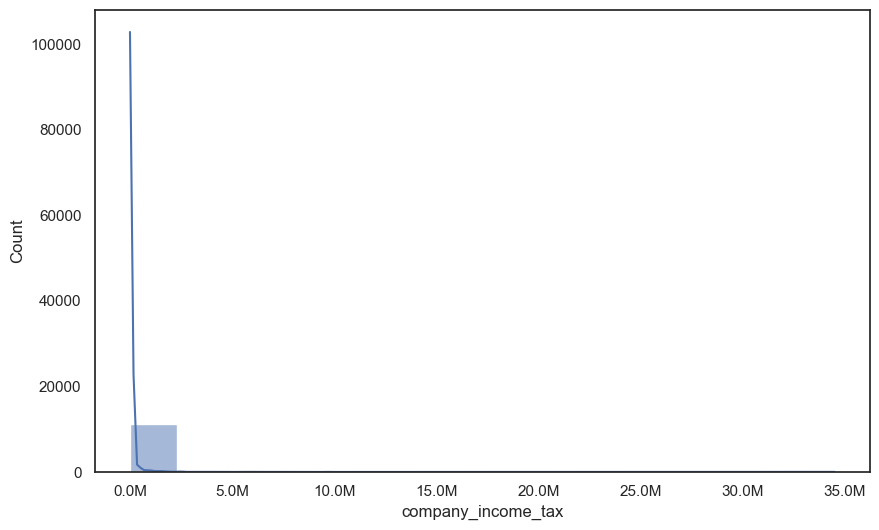

In [57]:
## company income tax distriution

import matplotlib.ticker as ticker

plt.figure(figsize=[10,6])
sns.histplot(df['company_income_tax'], kde=True)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6}M'))
plt.show();

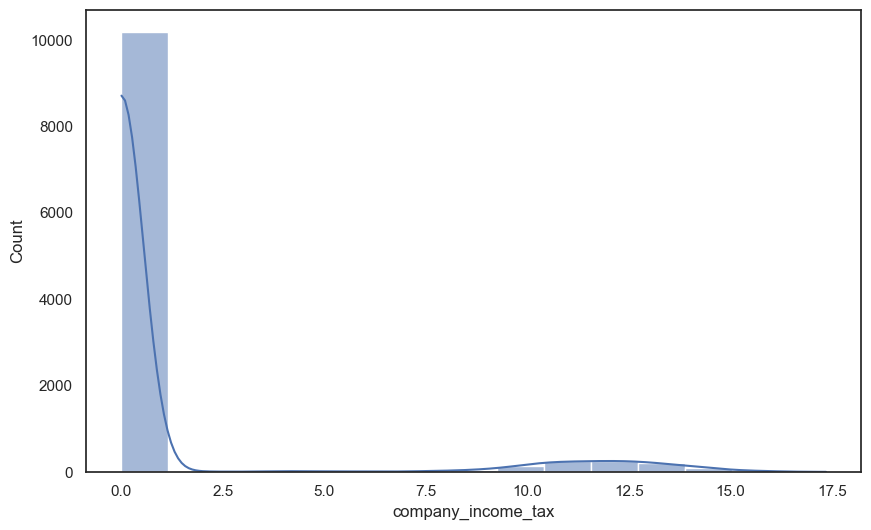

In [54]:
## log transform of company income tax distribution

import matplotlib.ticker as ticker

plt.figure(figsize=[10,6])
sns.histplot(np.log1p(df['company_income_tax']), kde=True)
plt.show();

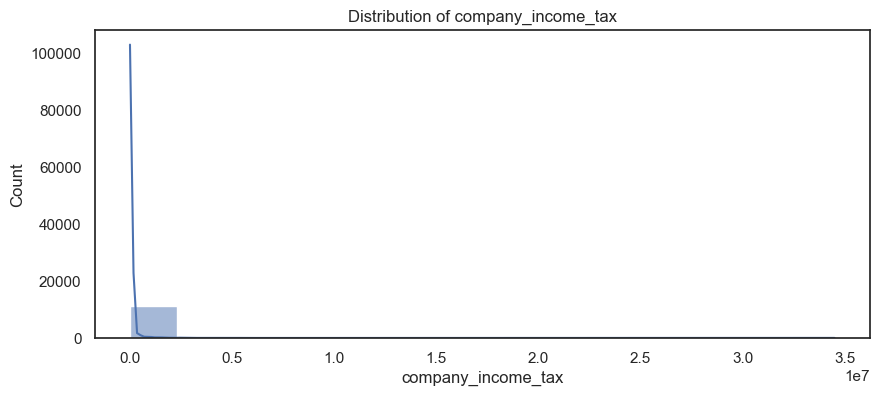

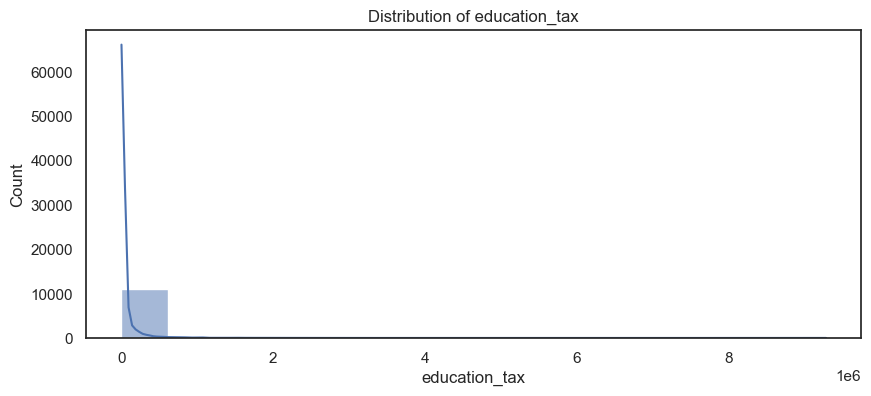

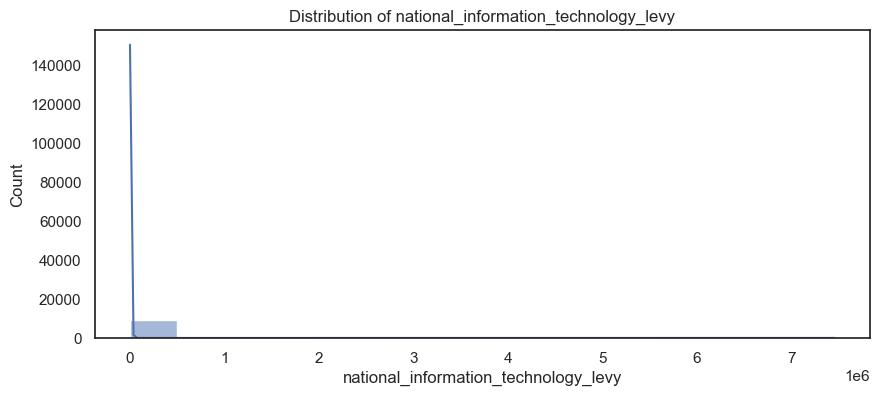

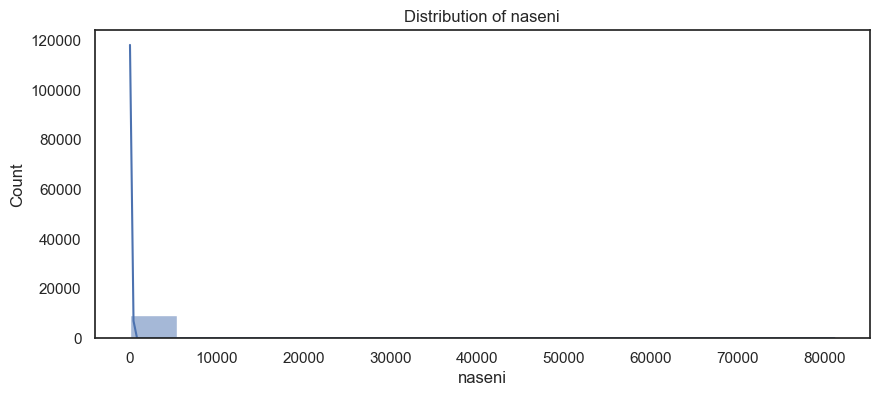

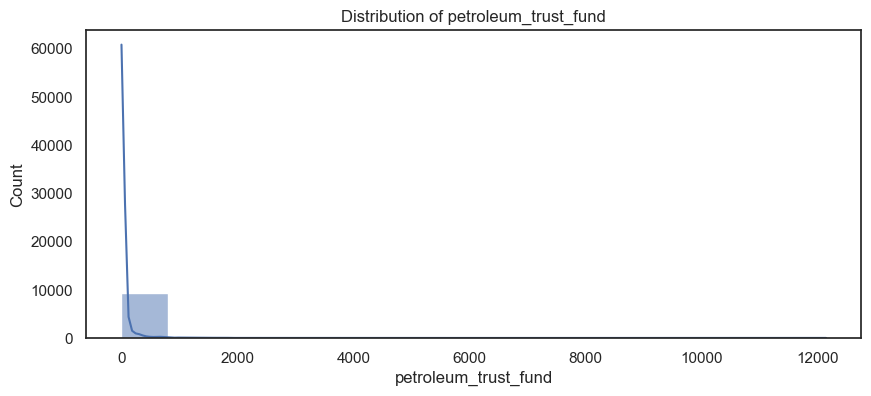

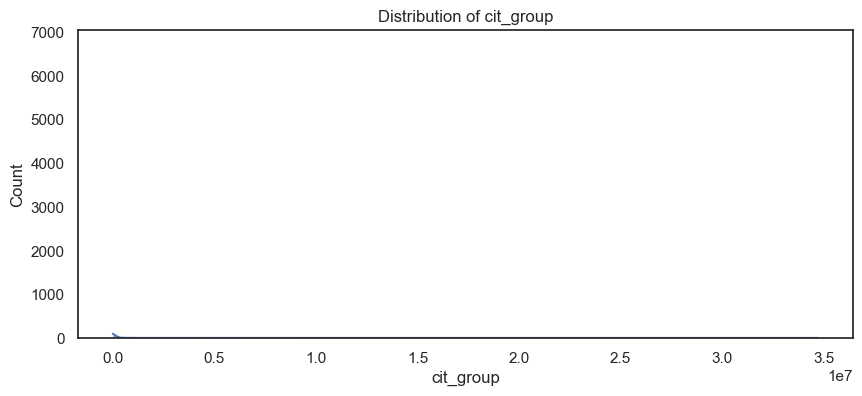

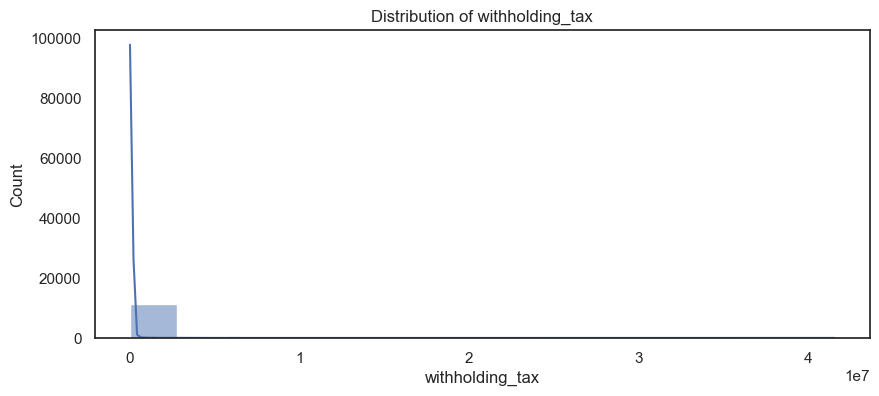

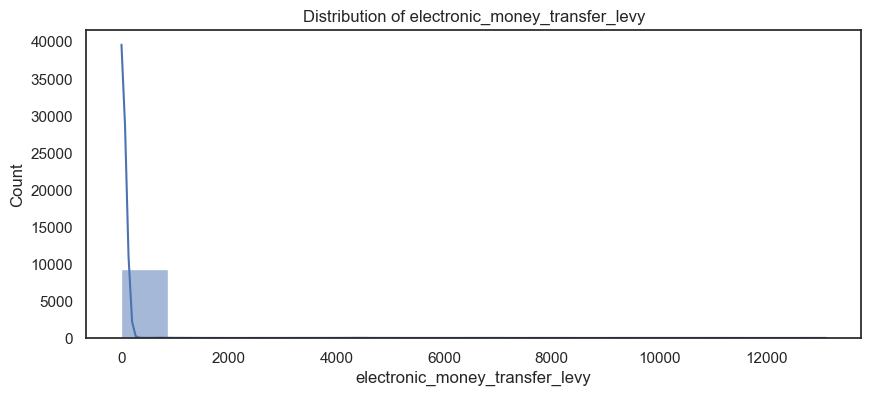

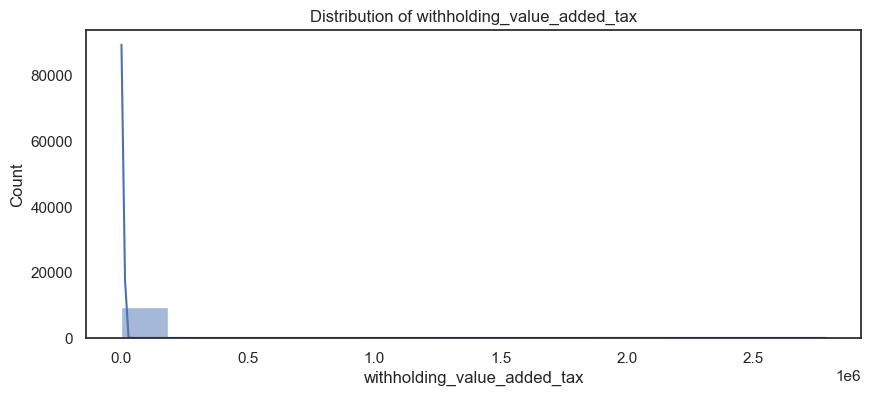

In [55]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=[10,4])
    sns.histplot(df[i], kde=True).set(title='Distribution of {}'.format(i))
    plt.show();

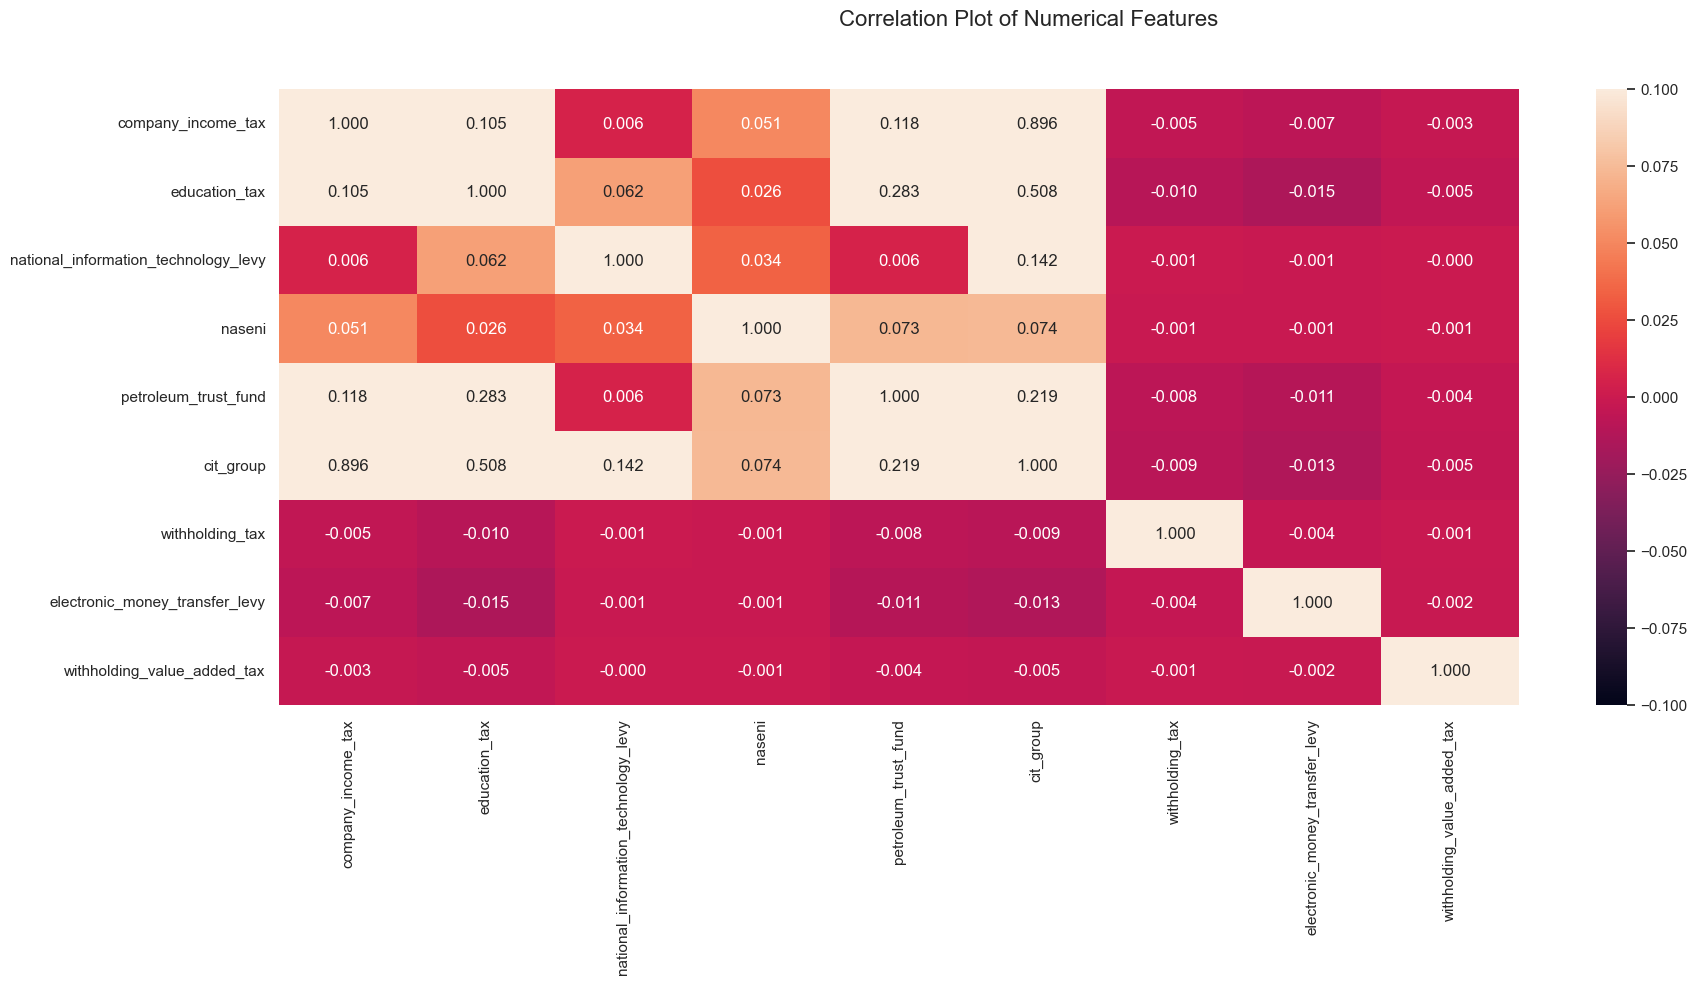

In [56]:
## correlation plot of features

plt.figure(figsize=[20,8])
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f', vmin=0, vmax=0)
plt.suptitle('Correlation Plot of Numerical Features', fontsize=16)
plt.savefig('corr_plot.jpg', dpi=300)
plt.show();

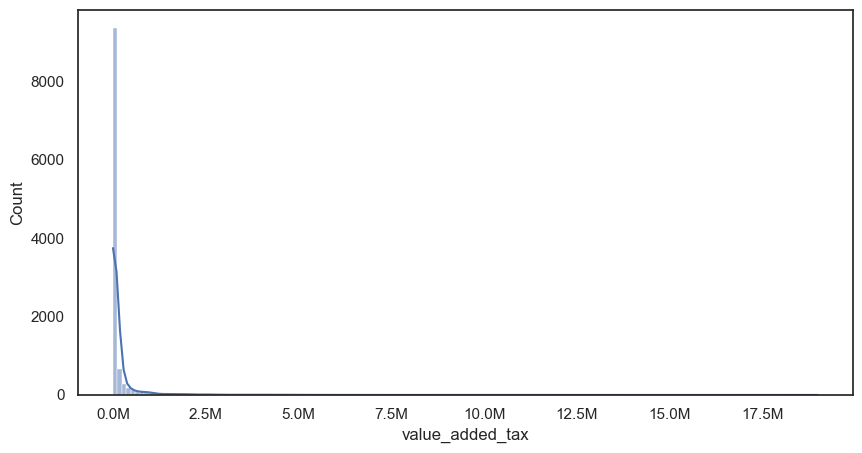

In [57]:
## value added tax distribution plot

plt.figure(figsize=[10,5])
df['value_added_tax'] = df['value_added_tax'].str.replace(',', '').astype(float)
sns.histplot(pd.to_numeric(df['value_added_tax']), kde=True, bins='scott')
ax = plt.gca()
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6}M'))
plt.show();

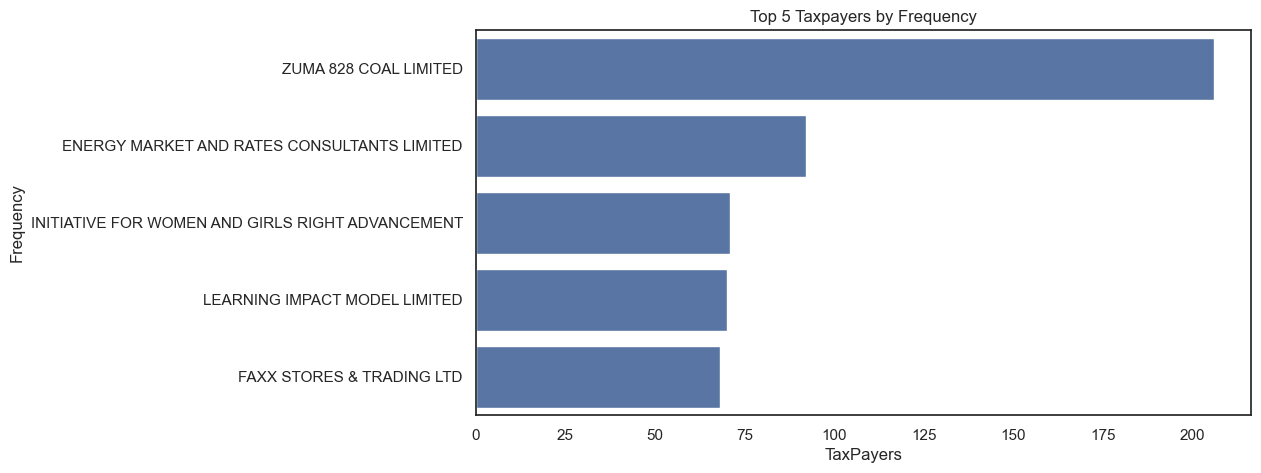

In [58]:
plt.figure(figsize=[10,5])
sns.barplot(data=df['taxpayer'].value_counts().head().reset_index(),
            y='taxpayer',
            x='count'
              ).set(title='Top 5 Taxpayers by Frequency',
                    xlabel='TaxPayers',
                    ylabel='Frequency')
plt.savefig('taxpayer_count.jpg', dpi=300)
plt.show();

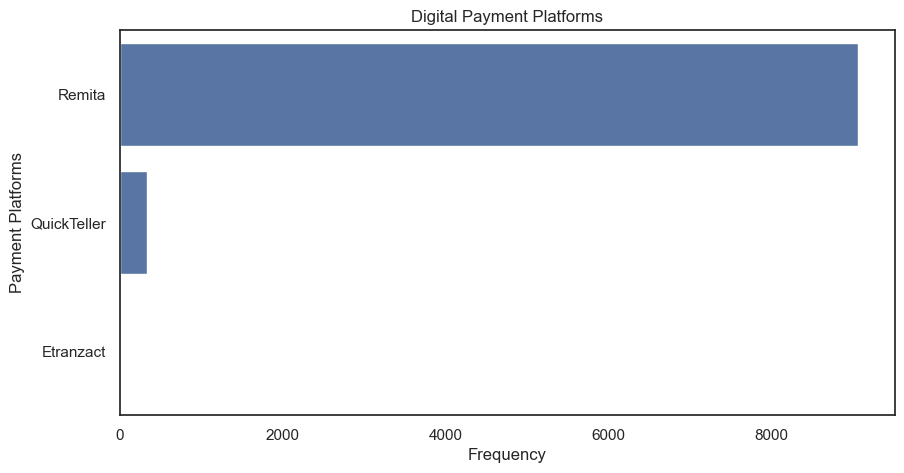

In [59]:
plt.figure(figsize=[10,5])
sns.countplot(df['payment_gateway']).set(title='Digital Payment Platforms',
                                        xlabel='Frequency',
                                        ylabel='Payment Platforms')
plt.savefig('payment_gateway.jpg', dpi=300)
plt.show();

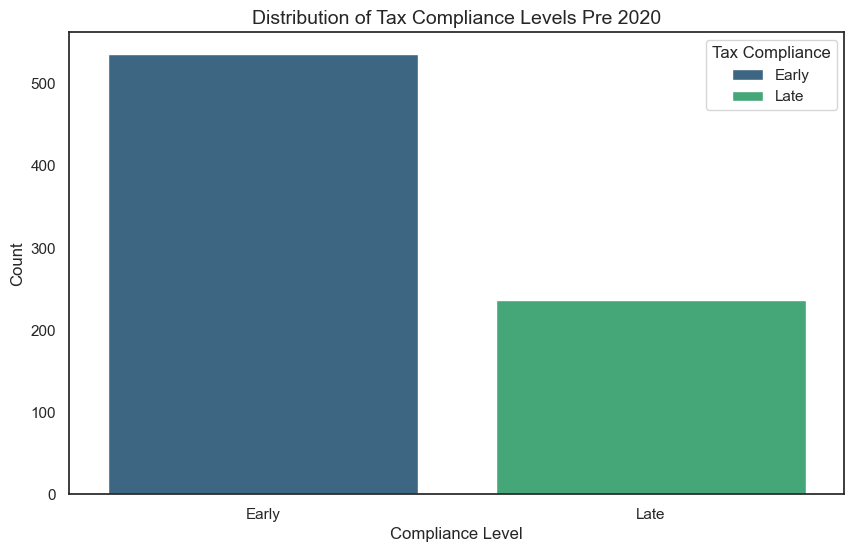

In [60]:
## tax compliance plot of pre 2020
pre_2020 = df[df['payment_date'] < '2020-01-01']

# Plotting the distribution of tax compliance levels
plt.figure(figsize=(10, 6))
sns.countplot(data=pre_2020, x='tax_compliance', palette='viridis')
plt.title('Distribution of Tax Compliance Levels Pre 2020', fontsize=14)
plt.xlabel('Compliance Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.show();

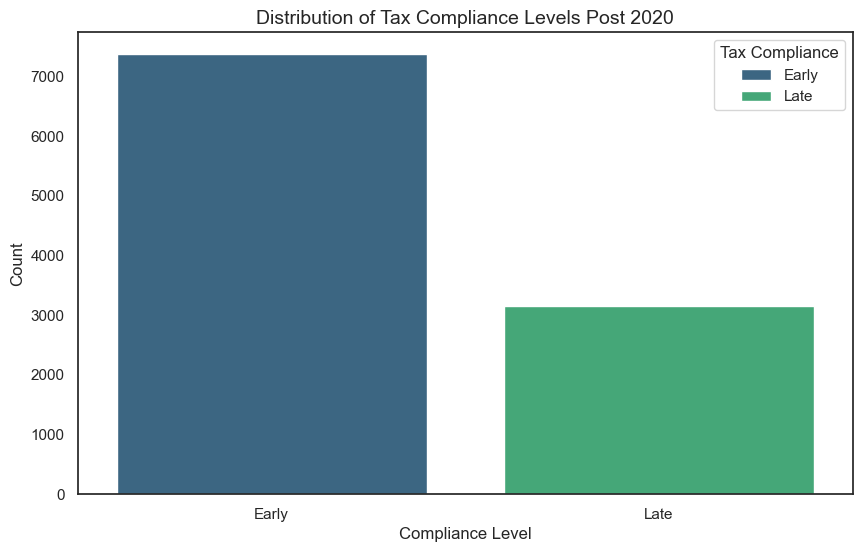

In [53]:
## tax compliance plot of post 2020
post_2020 = df[df['payment_date'] >= '2020-01-01']

# Plotting the distribution of tax compliance levels
plt.figure(figsize=(10, 6))
sns.countplot(data=post_2020, x='tax_compliance', palette='viridis')
plt.title('Distribution of Tax Compliance Levels Post 2020', fontsize=14)
plt.xlabel('Compliance Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.show();

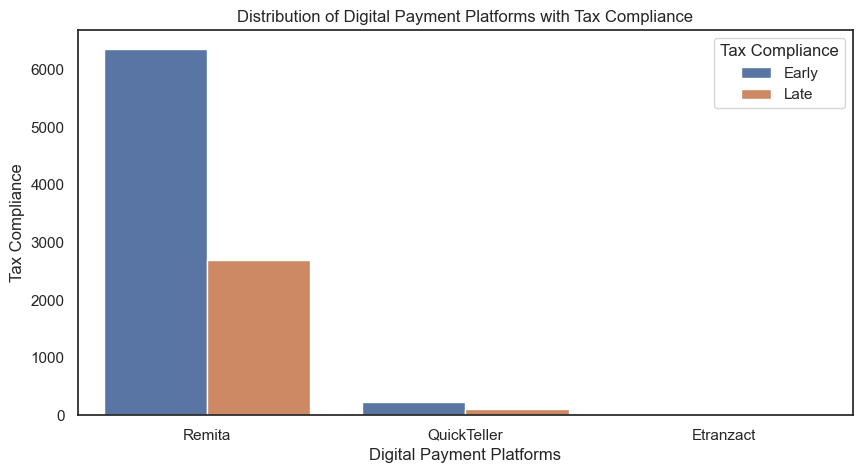

In [62]:
plt.figure(figsize=[10, 5])
sns.countplot(data=df, x='payment_gateway', hue='tax_compliance').set(
    title='Distribution of Digital Payment Platforms with Tax Compliance',
    xlabel='Digital Payment Platforms',
    ylabel='Tax Compliance'
)

plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.savefig('digital_compliance.jpg', dpi=300)
plt.show();

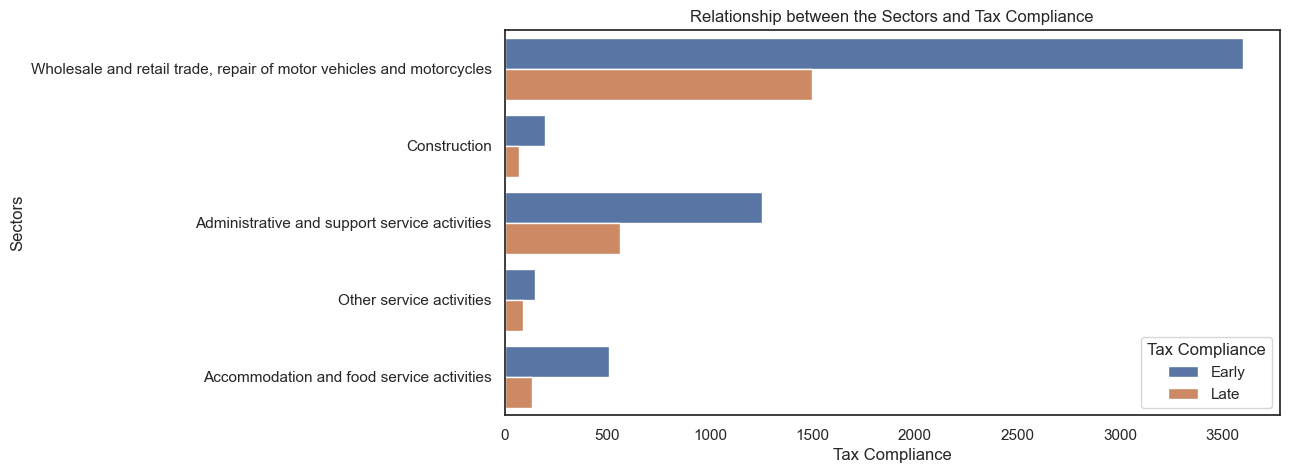

In [63]:
# Identify the top 5 sectors
top_5_sectors = df['sector'].value_counts().head(5).index
df_top_5_sectors = df[df['sector'].isin(top_5_sectors)]

plt.figure(figsize=[10, 5])
sns.countplot(data=df_top_5_sectors, y='sector', hue='tax_compliance')
plt.title('Relationship between the Sectors and Tax Compliance')
plt.xlabel('Tax Compliance')
plt.ylabel('Sectors')
plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.savefig('sector_compliance.jpg', dpi=300)
plt.show();

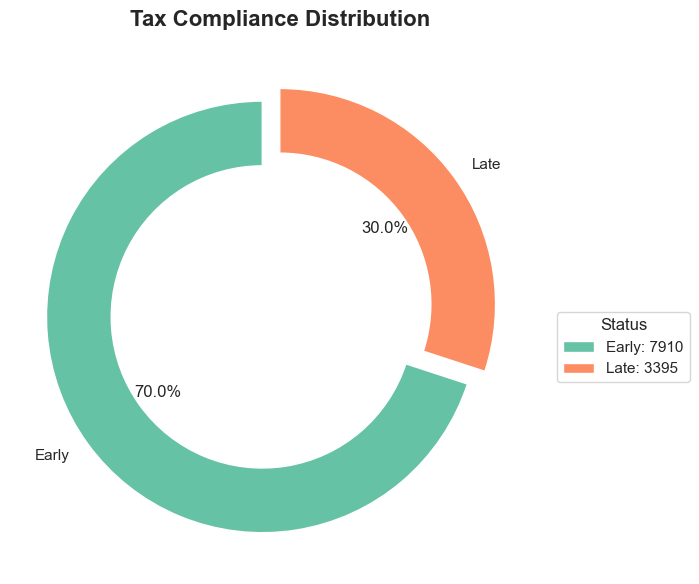

In [64]:
# Plotting
plt.figure(figsize=(8, 6))
explode = [0.1, 0]
plt.pie(df['tax_compliance'].value_counts(), labels=df['tax_compliance'].value_counts().index, autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#fc8d62'], wedgeprops=dict(width=0.3), explode=explode)
plt.title('Tax Compliance Distribution', fontsize=16, fontweight='bold')

# Legend with value counts
plt.legend(df['tax_compliance'].value_counts().index,
           title='Status', loc='best', bbox_to_anchor=(1, 0.5),
           labels=[f"{x}: {y}" for x, y in df['tax_compliance'].value_counts().items()])
plt.tight_layout()
plt.show();

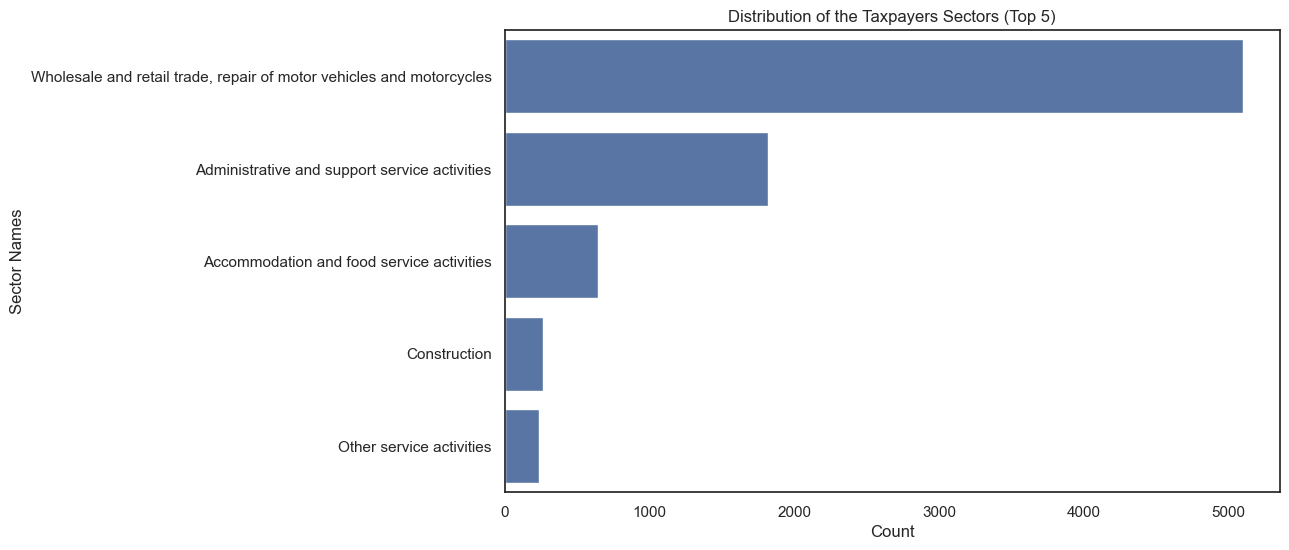

In [65]:
plt.figure(figsize=[10,6])
sns.barplot(x=df['sector'].value_counts().head().values, y=df['sector'].value_counts().head().index)
plt.title('Distribution of the Taxpayers Sectors (Top 5)')
plt.xlabel('Count')
plt.ylabel('Sector Names')
plt.savefig('sector_dist.jpg', dpi=500)
plt.show();

# Model Training

In [62]:
!pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 145.2 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.3 kB 145.2 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.3 kB 140.3 kB/s eta 0:00:02
   ---------- ---------------------------- 71.7/258.3 kB 217.9 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 249.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 249.8 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 315.4 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 401.2 kB/s eta 0:00:01
   --------------------------------- ---- 225.3/258.3 kB 404.2 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 402.9 kB

In [67]:
# Importing required libraries for model development
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score, recall_score, precision_score,
                            classification_report, roc_auc_score, confusion_matrix, auc, roc_curve, make_scorer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import category_encoders as ce

# Tuning the machine learning model
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, rand  # Hyperopt for hyperparameter optimization
import logging  # Logging for tracking events that happen when some software runs
from typing import Dict, Union, Any, Tuple  # Typing for type hints
import random  # Random for generating random numbers
import sys  # Sys for system-specific parameters and functions
from tqdm import tqdm  # Tqdm for progress bar visualization

import shap  # SHAP for model interpretability
import warnings; warnings.filterwarnings(action='ignore')  # Ignore warnings to keep the output clean

In [59]:
# Encode target column
label_encoder = LabelEncoder()
df['tax_compliance'] = label_encoder.fit_transform(df['tax_compliance'])

In [64]:
# creating features X
X = df.drop(['filing_date', 'payment_date', 'tax_compliance',
             'vat_compliance', 'cit_compliance'], axis=1)
y = df['tax_compliance']

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['O', 'category']).columns

numerical_cols = X.select_dtypes(include=np.number).columns

# Create preprocessors for each type of column
categorical_transformer = ce.TargetEncoder(cols=categorical_cols)
numerical_transformer = StandardScaler()
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ce.TargetEncoder(), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train = pipeline.fit_transform(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=list(categorical_cols) + list(numerical_cols))


# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=101)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Transform the test data
X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test, columns=list(categorical_cols) + list(numerical_cols))


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12666, 21) (12666,)
(2261, 21) (2261,)


In [71]:
y_train.value_counts()

tax_compliance
1    6333
0    6333
Name: count, dtype: int64

## Decision Tree Classifier Model

In [72]:
# Instantiate the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=101)

# Fit the model to the training data
# X_train: training features
# y_train: training labels
dt_model.fit(X_train, y_train)

# Predict the labels for the test data
# X_test: test features
y_pred_dt = dt_model.predict(X_test)

In [73]:
# Perform cross-validation on the data using the DecisionTreeClassifier model
# cross_val_score: Evaluate a score by cross-validation
# dt_model: the model to be evaluated
# X_train: training features
# y_train: training labels
# cv: cross-validation splitting strategy (StratifiedKFold in this case)
# scoring: scoring metric (ROC-AUC in this case)

scores_dt = cross_val_score(dt_model,
                            X_train,
                            y_train,
                            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=101),
                            scoring=make_scorer(roc_auc_score))

# Print the cross-validation scores
print("Cross-validation scores:", scores_dt)

# Print the mean accuracy (mean of the cross-validation scores)
print("Mean accuracy:", scores_dt.mean())

# Print the standard deviation of the cross-validation scores
print("Standard deviation:", scores_dt.std())

Cross-validation scores: [0.70685198 0.70772025 0.69913368 0.70752571 0.71682042 0.69044738
 0.70027114 0.70001653 0.70898674 0.67383915]
Mean accuracy: 0.7011612973147574
Standard deviation: 0.011357188022993875


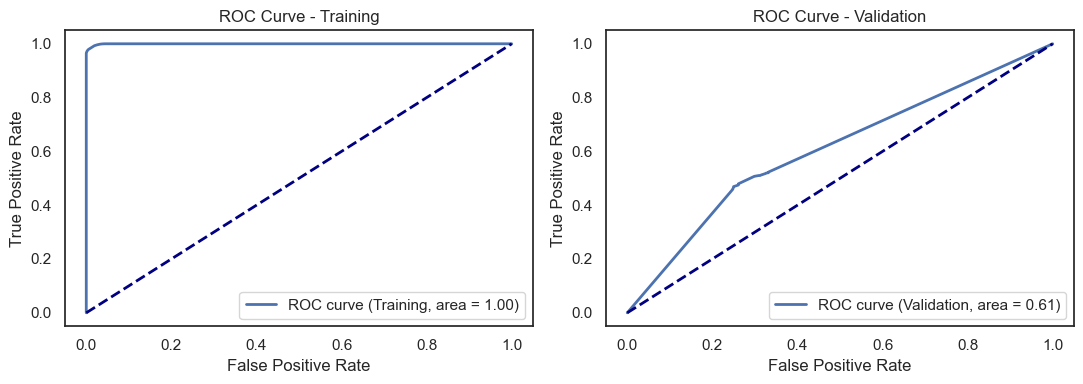

In [73]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(dt_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(dt_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [74]:
# Evaluation Metrics

print('------------------------ Model Evaluation Metrics Scores for DecisionTreeClassifier Algorithm------------------------')
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_dt, beta=1.5):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

------------------------ Model Evaluation Metrics Scores for DecisionTreeClassifier Algorithm------------------------
Accuracy: 0.6603
Precision: 0.4432
Recall: 0.4795
F1-score: 0.4607
F-beta score: 0.4677
ROC-AUC: 0.6075
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      1577
           1       0.44      0.48      0.46       684

    accuracy                           0.66      2261
   macro avg       0.60      0.61      0.61      2261
weighted avg       0.67      0.66      0.66      2261

Confusion Matrix:
 [[1165  412]
 [ 356  328]]


In [63]:
# save the decision tree model
import joblib
joblib.dump(dt_model, 'dt_model.joblib')

['dt_model.joblib']

## Random Forest Algorithm

In [75]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [105]:
# Lets's perform Cross-validation on the data

scores_rf = cross_val_score(rf_model,
                         X_train,
                         y_train,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),
                         scoring=make_scorer(roc_auc_score))
print("Cross-validation scores:", scores_rf)
print("Mean accuracy:", scores_rf.mean())
print("Standard deviation:", scores_rf.std())

Cross-validation scores: [0.71480992 0.71143677 0.7231442  0.72064392 0.70646574]
Mean accuracy: 0.7153001094691742
Standard deviation: 0.006054714701116483


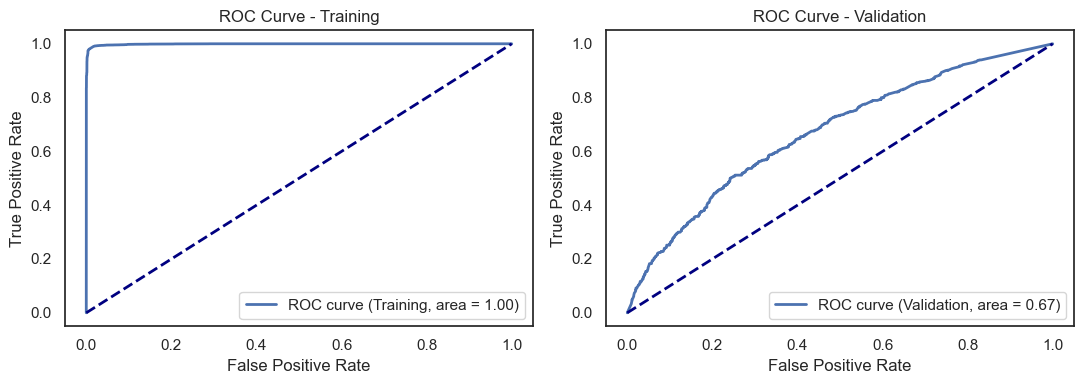

In [76]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(rf_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(rf_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [77]:
# Evaluation Metrics

print('------------------------ Model Evaluation Metrics Scores for RandomForestClassifier Algorithm------------------------')
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_rf, beta=1.5):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

------------------------ Model Evaluation Metrics Scores for RandomForestClassifier Algorithm------------------------
Accuracy: 0.6780
Precision: 0.4690
Recall: 0.4868
F1-score: 0.4778
F-beta score: 0.4812
ROC-AUC: 0.6704
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1577
           1       0.47      0.49      0.48       684

    accuracy                           0.68      2261
   macro avg       0.62      0.62      0.62      2261
weighted avg       0.68      0.68      0.68      2261

Confusion Matrix:
 [[1200  377]
 [ 351  333]]


In [67]:
# save the random forest tree model
import joblib
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

## XGBoost Algorithm

## Default Model

In [79]:
# Instantiate the XGBoost classifier
# missing=np.nan: Handle missing values as NaN
default_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
# X_train: training features
# y_train: training labels
# eval_set: list containing a tuple of the validation data (X_test, y_test) used for early stopping
# early_stopping_rounds: stop training if the validation score doesn't improve for 50 consecutive rounds
default_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=0)

# Predict the labels for the test data
# X_test: test features
y_pred_default = default_model.predict(X_test)

In [80]:
# Evaluation Metrics

print('------------------------ Model Evaluation Metrics Scores for Default XGBoost Algorithm------------------------')
print(f"Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_default):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_default):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_default):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_default, beta=3):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, default_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))

------------------------ Model Evaluation Metrics Scores for Default XGBoost Algorithm------------------------
Accuracy: 0.6391
Precision: 0.4308
Recall: 0.6009
F1-score: 0.5018
F-beta score: 0.5781
ROC-AUC: 0.6877
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      1577
           1       0.43      0.60      0.50       684

    accuracy                           0.64      2261
   macro avg       0.61      0.63      0.61      2261
weighted avg       0.68      0.64      0.65      2261

Confusion Matrix:
 [[1034  543]
 [ 273  411]]


Selecting the Right Beta: The ideal beta value will depend on the specific costs associated with false positives and false negatives in the tax compliance context. <br>

β = 1: Equivalent to the F1 score (equal weight to precision and recall). <br>
β > 1: Puts more emphasis on recall (minimizing false negatives). <br>
β < 1: Puts more emphasis on precision (minimizing false positives). <br>

If failing to identify a late payment is very costly (e.g., leading to missed deadlines, penalties), then a higher beta (e.g., β = 3) might be appropriate. <br>

If incorrectly flagging an early payment as late is costly (e.g., causing unnecessary investigations), then a lower beta (e.g., β = 1.5) might be better. <br>

In [110]:
# Lets's perform Cross-validation on the data

scores_default = cross_val_score(default_model,
                         X_train,
                         y_train,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),
                         scoring=make_scorer(roc_auc_score))
print("Cross-validation scores:", scores_default)
print("Mean accuracy:", scores_default.mean())
print("Standard deviation:", scores_default.std())

Cross-validation scores: [0.70611719 0.72042908 0.72430149 0.71392755 0.7043868 ]
Mean accuracy: 0.7138324215998022
Standard deviation: 0.007770081603462305


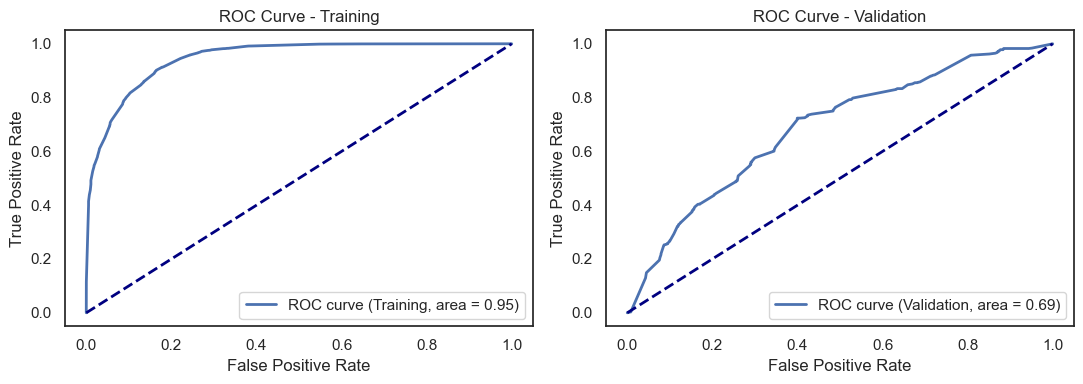

In [81]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(default_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(default_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [73]:
# save default model
import joblib;joblib.dump(default_model, 'default_xgboost_model.joblib')

['default_xgboost_model.joblib']

## Tuned Model Using GridSearchCV

In [83]:
# from sklearn.utils import compute_class_weight

# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_ratio = class_weights[0] / class_weights[1]

# print("Ratio of negative to positive samples in training data:", class_ratio)

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Parameter distributions for randomized search
param_dist = {
    'max_depth': randint(3, 10),             # Typical range for tree depth
    'min_child_weight': uniform(1, 10),      # Balance between overfitting and underfitting
    'subsample': uniform(0.5, 0.5),         # Percentage of samples used per tree (0.5-1.0)
    'colsample_bytree': uniform(0.5, 0.5),   # Percentage of features used per tree (0.5-1.0)
    'scale_pos_weight': uniform(1, 10),      # Adjust for class imbalance (start conservatively)
    'gamma': uniform(0, 0.5),               # Minimum loss reduction (0-0.5)
    'reg_lambda': uniform(0, 1),            # L2 regularization (0-1 is common)
    'reg_alpha': uniform(0, 1),             # L1 regularization (0-1 is common)
    'n_estimators': randint(100, 1000),      # Number of trees (wide range for exploration)
    'eta': uniform(0.01, 0.2)               # Learning rate (smaller values often better)
}

# Base XGBoost model (unchanged)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    nthread=-1,          
    verbose=0,
    seed=101,
    early_stopping_rounds=50
)

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=50,            # Number of parameter combinations to try
    scoring='roc_auc',    # Optimize for AUC-ROC
    cv=5,                # 5-fold cross-validation
    verbose=2,            # Show some progress
    n_jobs=-1,             # Use all available cores
    random_state=42       # For reproducibility
)

random_search.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# Best model and parameters
tuned_model = random_search.best_estimator_
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Predictions and Evaluation
y_pred_tuned = tuned_model.predict(X_test)

# Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_tuned, beta=3):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-auc:0.90866	validation_1-auc:0.66253
[1]	validation_0-auc:0.92279	validation_1-auc:0.66491
[2]	validation_0-auc:0.92339	validation_1-auc:0.65981
[3]	validation_0-auc:0.92541	validation_1-auc:0.66080
[4]	validation_0-auc:0.93226	validation_1-auc:0.66327
[5]	validation_0-auc:0.93345	validation_1-auc:0.67372
[6]	validation_0-auc:0.93635	validation_1-auc:0.67440
[7]	validation_0-auc:0.93765	validation_1-auc:0.67789
[8]	validation_0-auc:0.93815	validation_1-auc:0.67702
[9]	validation_0-auc:0.94107	validation_1-auc:0.68319
[10]	validation_0-auc:0.94030	validation_1-auc:0.68338
[11]	validation_0-auc:0.94100	validation_1-auc:0.68206
[12]	validation_0-auc:0.94133	validation_1-auc:0.68606
[13]	validation_0-auc:0.94124	validation_1-auc:0.68758
[14]	validation_0-auc:0.94180	validation_1-auc:0.68770
[15]	validation_0-auc:0.94411	validation_1-auc:0.68838
[16]	validation_0-auc:0.94421	validation_1-auc:0.68788
[17]	validati

In [86]:
# # list values for hyperparameters for tuning the model
# best_hyperparams = {
#     'objective': 'binary:logistic',  # Logistic loss function
#     'n_estimators': 800,              # Number of boosting rounds (iterations)
#     'eta': 0.1,                      # Learning rate
#     'max_depth': 7,                   # Maximum tree depth
#     # 'min_child_weight': 3,
#     'subsample': 0.5,                 # Subsample ratio of the training instances
#     'colsample_bytree': 0.7,          # Subsample ratio of columns when constructing each tree
#     # 'reg_lambda': 5,                  # L2 regularization term on weights
#     # 'reg_alpha': 5,                   # L1 regularization term on weights
#     'eval_metric': 'auc',            # Evaluation metric
#     'tree_method': 'hist',            # Use histogram-based algorithm for speed on larger datasets
#     'nthread': -1,                    # Use all available CPU cores
#     'verbose': 0,                    # Turn off verbose output (matches 'verbose': False)
#     'seed': 101,                     # Random seed for reproducibility
#     'early_stopping_rounds': 50    # Stop if the validation score doesn't improve for 50 rounds
# }

In [87]:
tuned_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9745728657956929, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eta=0.18733607745960953, eval_metric='auc', feature_types=None,
              gamma=0.13044681167085698, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7.258599157142363, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=541,
              n_jobs=None, nthread=-1, ...)

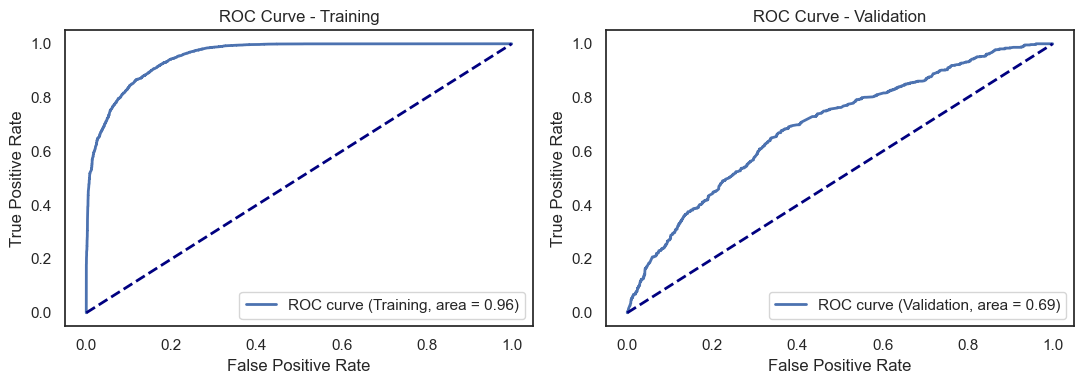

In [88]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(tuned_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(tuned_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [73]:
# save default model
import joblib;joblib.dump(tuned_model, 'tuned_xgboost_model.joblib')

['tuned_xgboost_model.joblib']

## Feature Importances

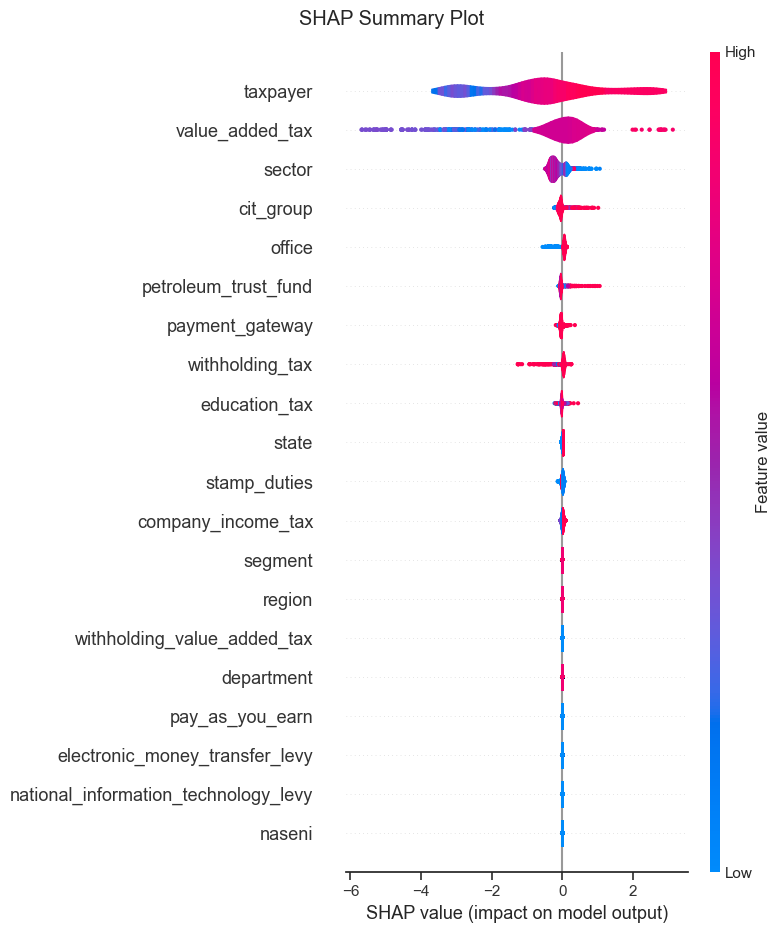

In [89]:
# Create the SHAP explainer
plt.figure(figsize=[15, 150])
plt.suptitle('SHAP Summary Plot')

explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
shap.summary_plot(shap_values, X_test, plot_type='violin')
plt.show();

## Comparing Default and Tuned Models

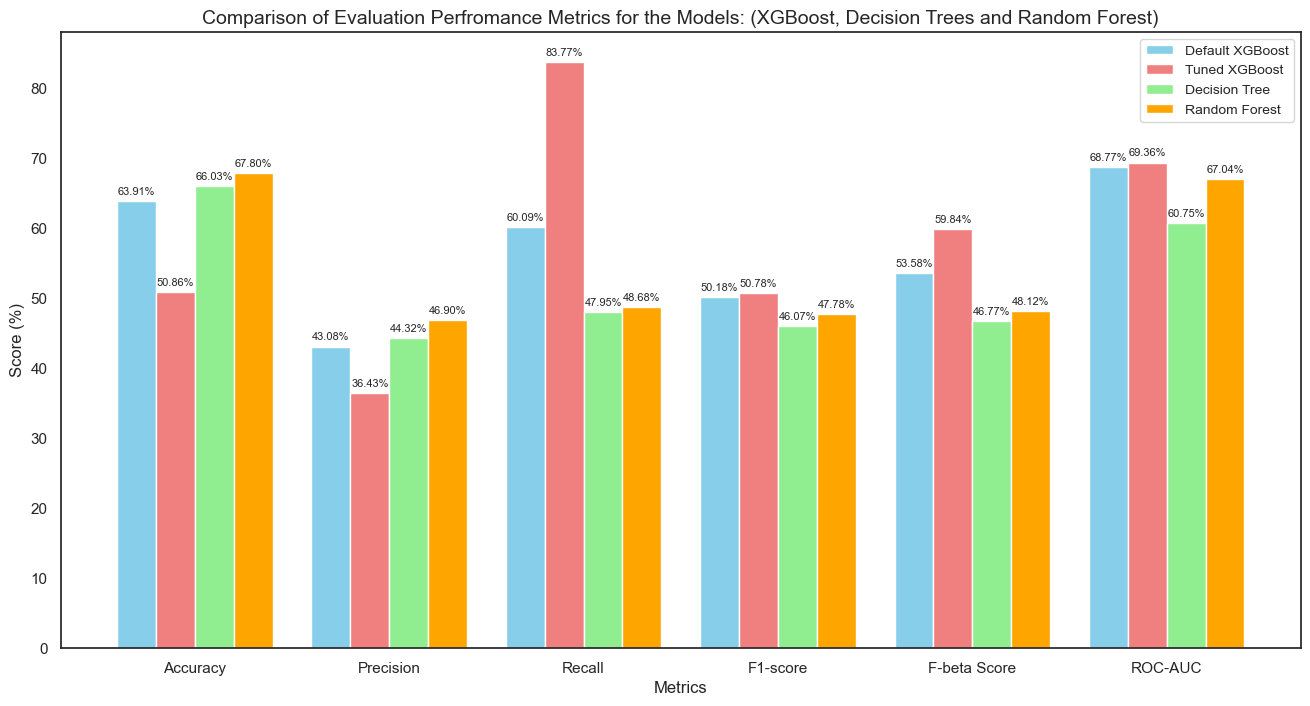

In [90]:
# Evaluation metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "F-beta Score", "ROC-AUC"]

def to_percentage(scores):
    return [score * 100 for score in scores]

default_scores = to_percentage([accuracy_score(y_test, y_pred_default), precision_score(y_test, y_pred_default),
                  recall_score(y_test, y_pred_default), f1_score(y_test, y_pred_default),
                  fbeta_score(y_test, y_pred_default, beta=1.5),
                  roc_auc_score(y_test, default_model.predict_proba(X_test)[:, 1])])

tuned_scores = to_percentage([accuracy_score(y_test, y_pred_tuned), precision_score(y_test, y_pred_tuned),
                recall_score(y_test, y_pred_tuned), f1_score(y_test, y_pred_tuned),
                fbeta_score(y_test, y_pred_tuned, beta=1.5),
                roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1])])

dt_scores = to_percentage([accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt),
             recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt),
             fbeta_score(y_test, y_pred_dt, beta=1.5),
             roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])])

rf_scores = to_percentage([accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf),
             recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf),
             fbeta_score(y_test, y_pred_rf, beta=1.5),
             roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])])

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

bars1 = ax.bar(r1, default_scores, color='skyblue', width=bar_width, label='Default XGBoost')
bars2 = ax.bar(r2, tuned_scores, color='lightcoral', width=bar_width, label='Tuned XGBoost')
bars3 = ax.bar(r3, dt_scores, color='lightgreen', width=bar_width, label='Decision Tree')
bars4 = ax.bar(r4, rf_scores, color='orange', width=bar_width, label='Random Forest')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=8)  # Smaller font size

ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_title('Comparison of Evaluation Perfromance Metrics for the Models: (XGBoost, Decision Trees and Random Forest)', fontsize=14)
ax.set_xticks([r + 1.5 * bar_width for r in range(len(metrics))])
ax.set_xticklabels(metrics)
ax.legend(fontsize=10)

# plt.savefig('model_comparison_perfromance.jpg', dpi=1000)
plt.show();

## Confusion Matrices

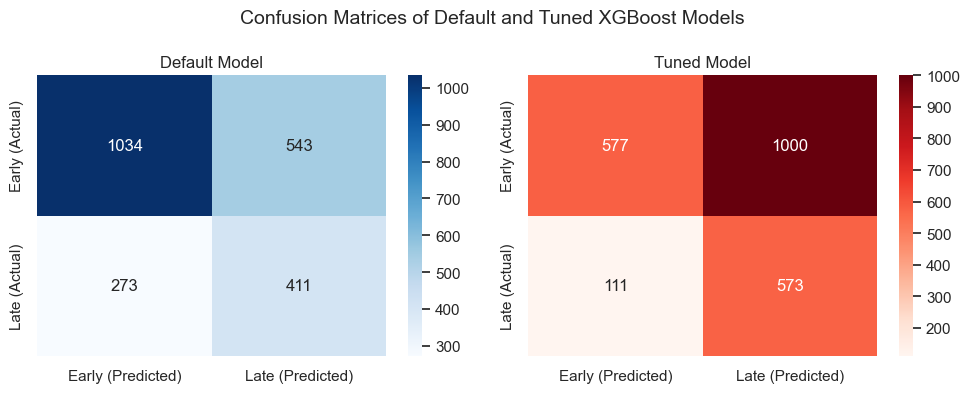

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Confusion Matrices of Default and Tuned XGBoost Models', fontsize=14)

# Default Model
cm_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Early (Predicted)', 'Late (Predicted)'], 
            yticklabels=['Early (Actual)', 'Late (Actual)'])
axes[0].set_title('Default Model', fontsize=12)

# Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Early (Predicted)', 'Late (Predicted)'],
            yticklabels=['Early (Actual)', 'Late (Actual)'])
axes[1].set_title('Tuned Model', fontsize=12)

plt.tight_layout()
plt.show();